<a href="https://colab.research.google.com/github/JuanmaVL/SyS/blob/main/Corte2/P2/Copia_de_Parcial_2S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib

# PREGUNTA 1

wo= 1.0
Fo= 1.5707963267948966


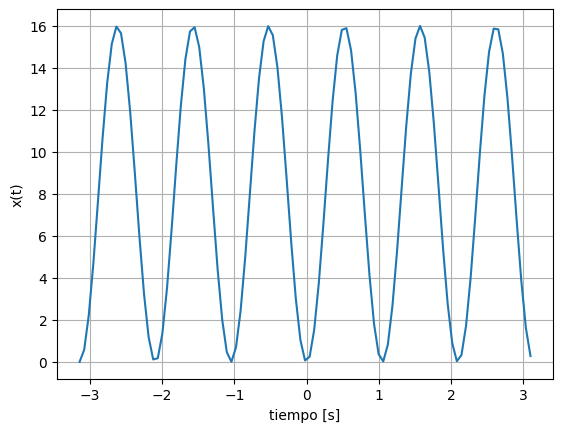

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo

x = abs(4*np.sin(3*tv))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.grid()
plt.show()

In [ ]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 50 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [ ]:
# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=50, min=-50), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

In [ ]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = 8 # nivel dc C_0
cn[N-6] = -4 #armónico -6
cn[N+6] = -4 #armónico +6

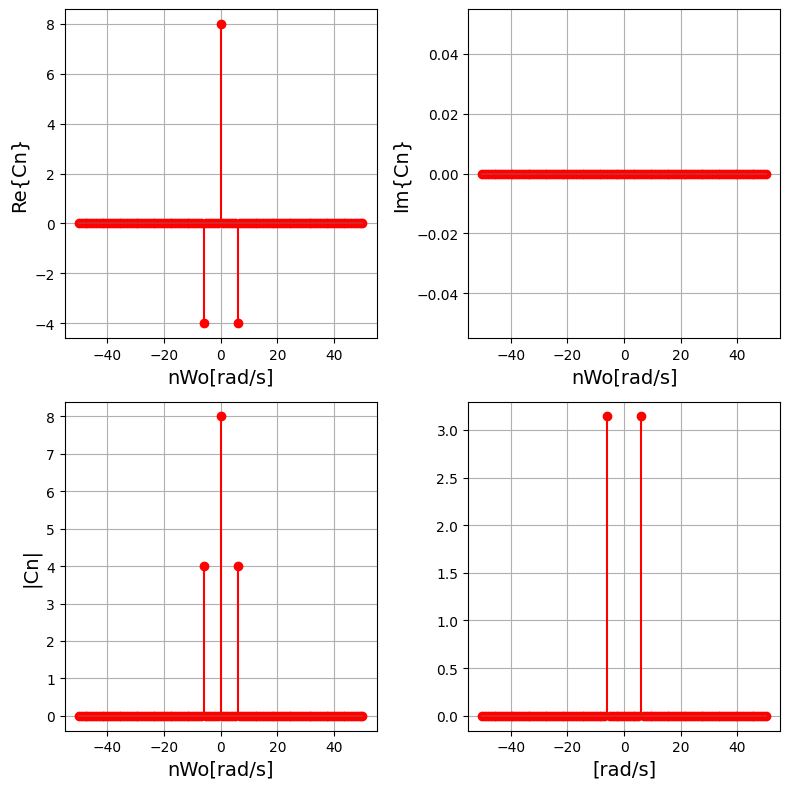

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'nWo[rad/s]',fontsize = 14)
plt.ylabel(r'Re{Cn}',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'nWo[rad/s]',fontsize = 14)
plt.ylabel(r'Im{Cn}',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'nWo[rad/s]',fontsize = 14)
plt.ylabel(r'|Cn|',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'[rad/s]',fontsize = 14)
plt.ylabel(r'',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [ ]:
#graficar reconstrucción

Px = 96 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='Xe(t)') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

# **PREGUNTA 2**

***PARTE TEORICA***

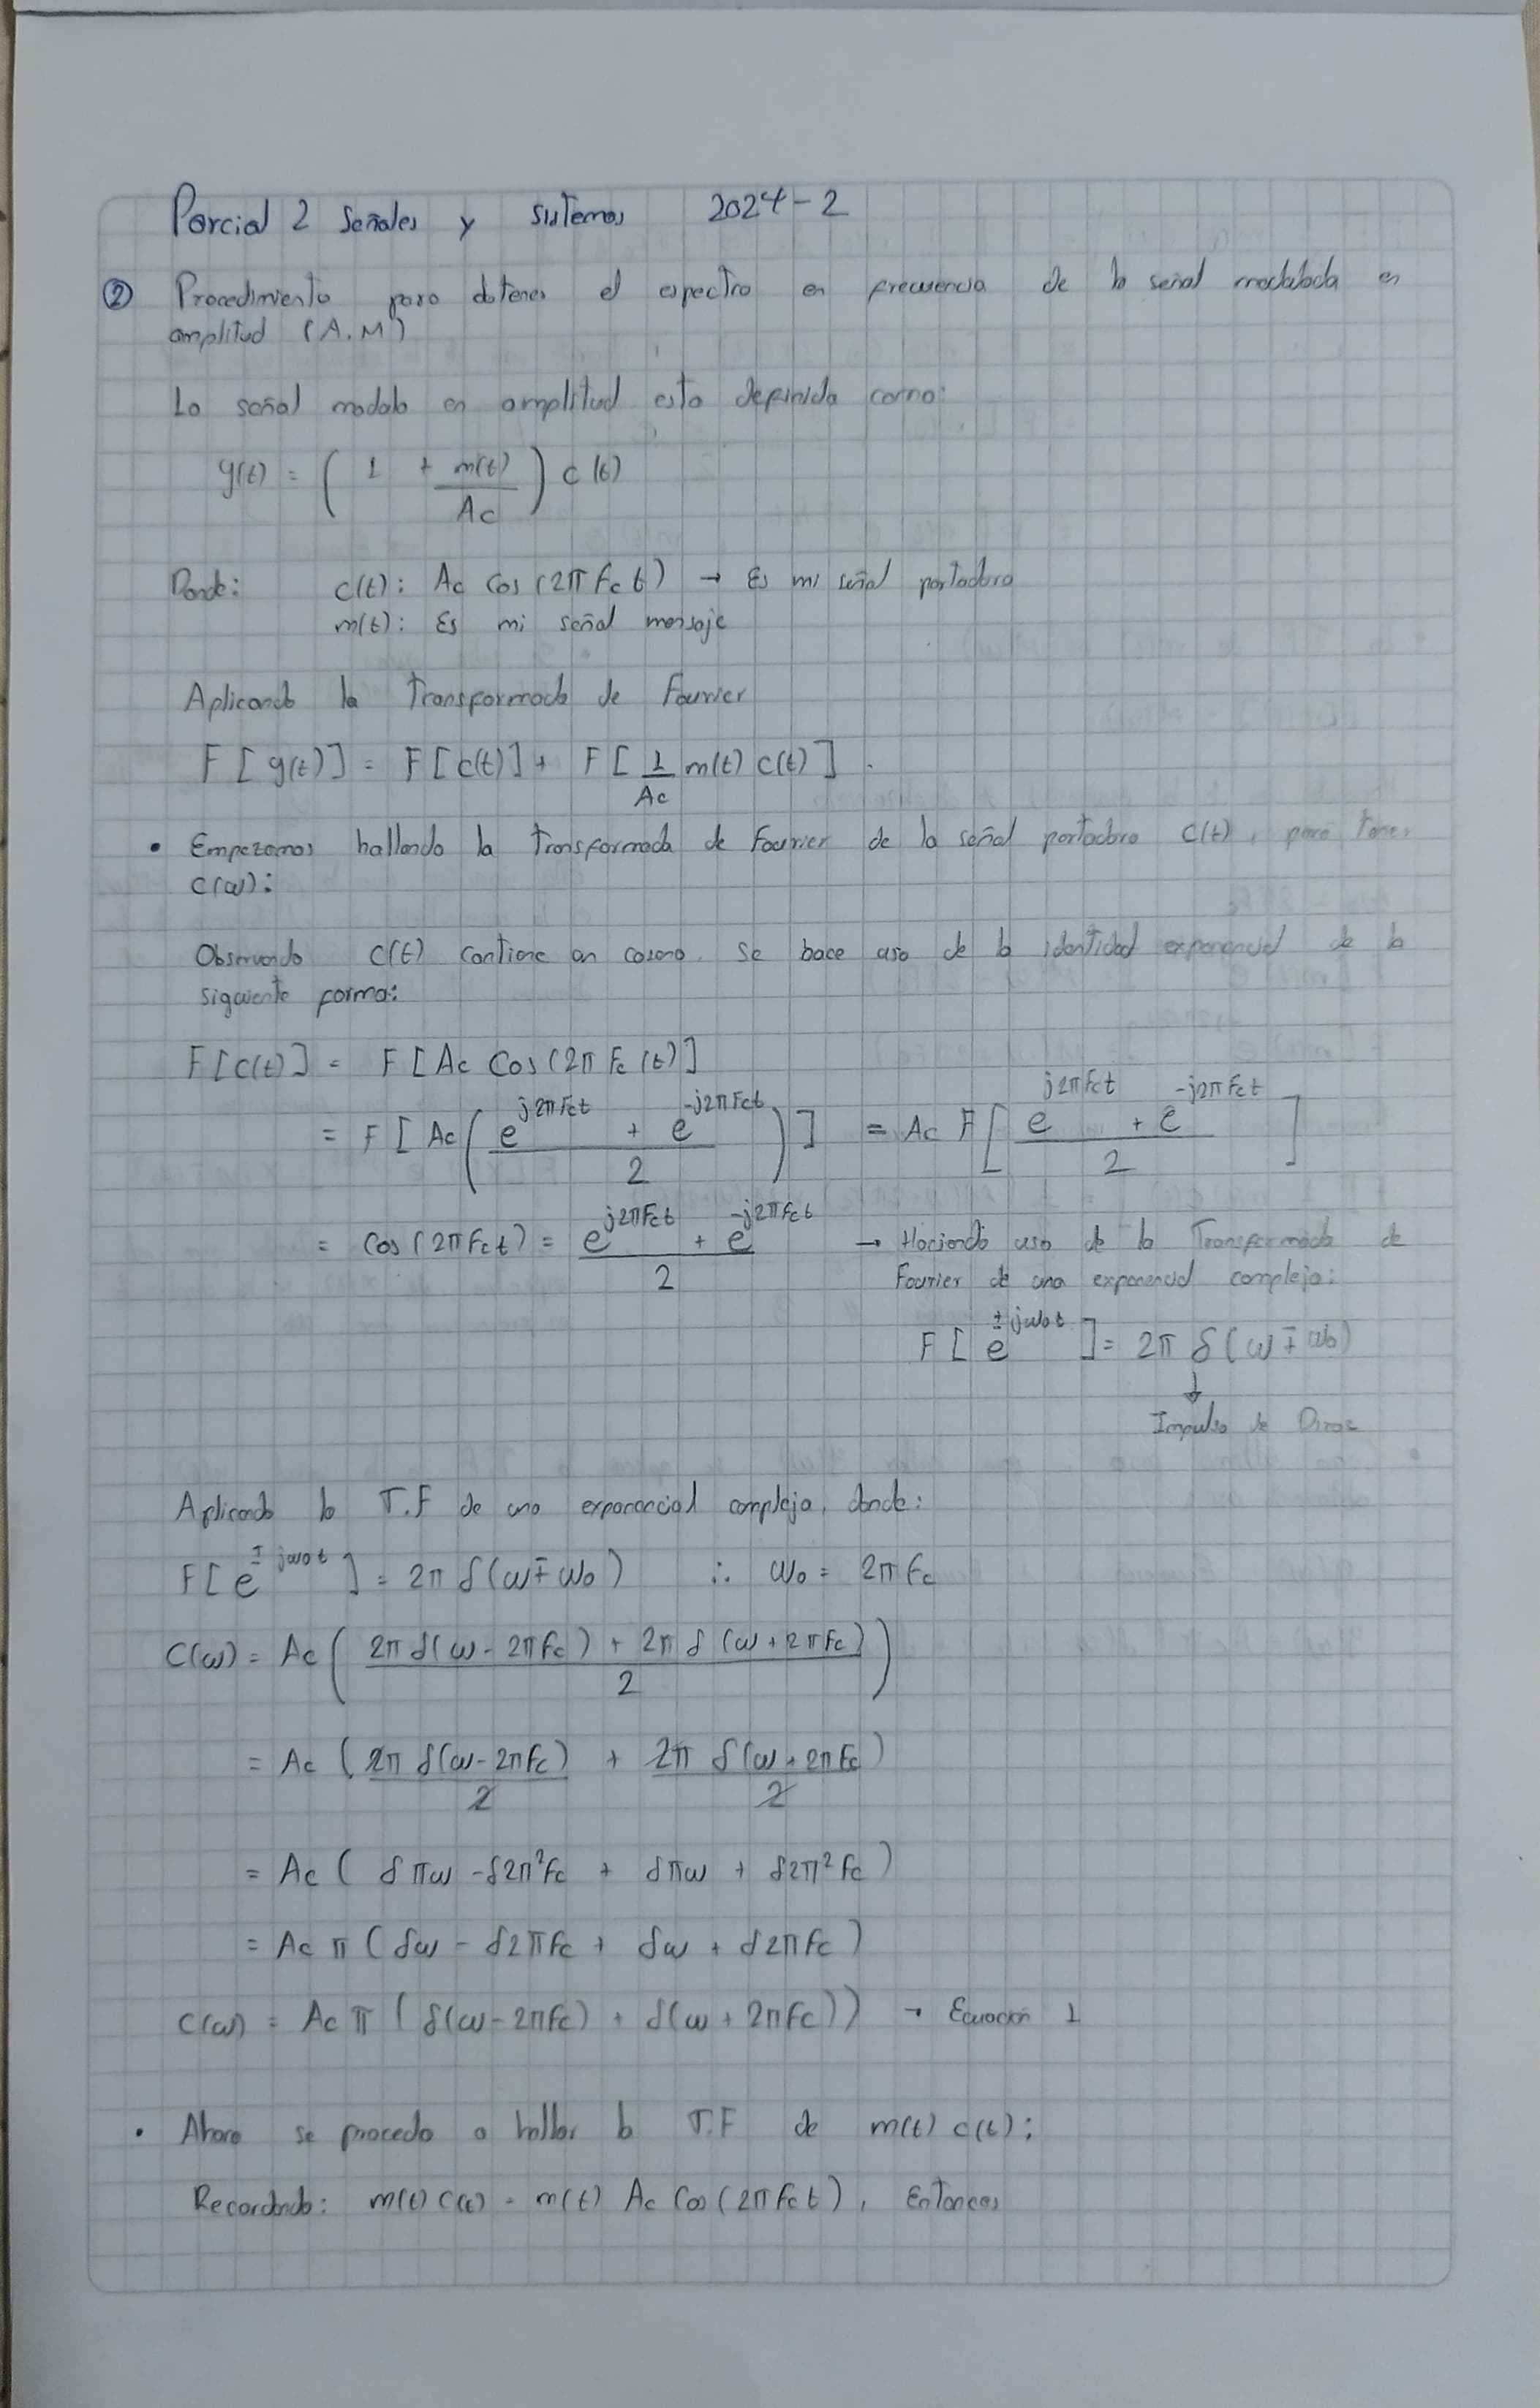

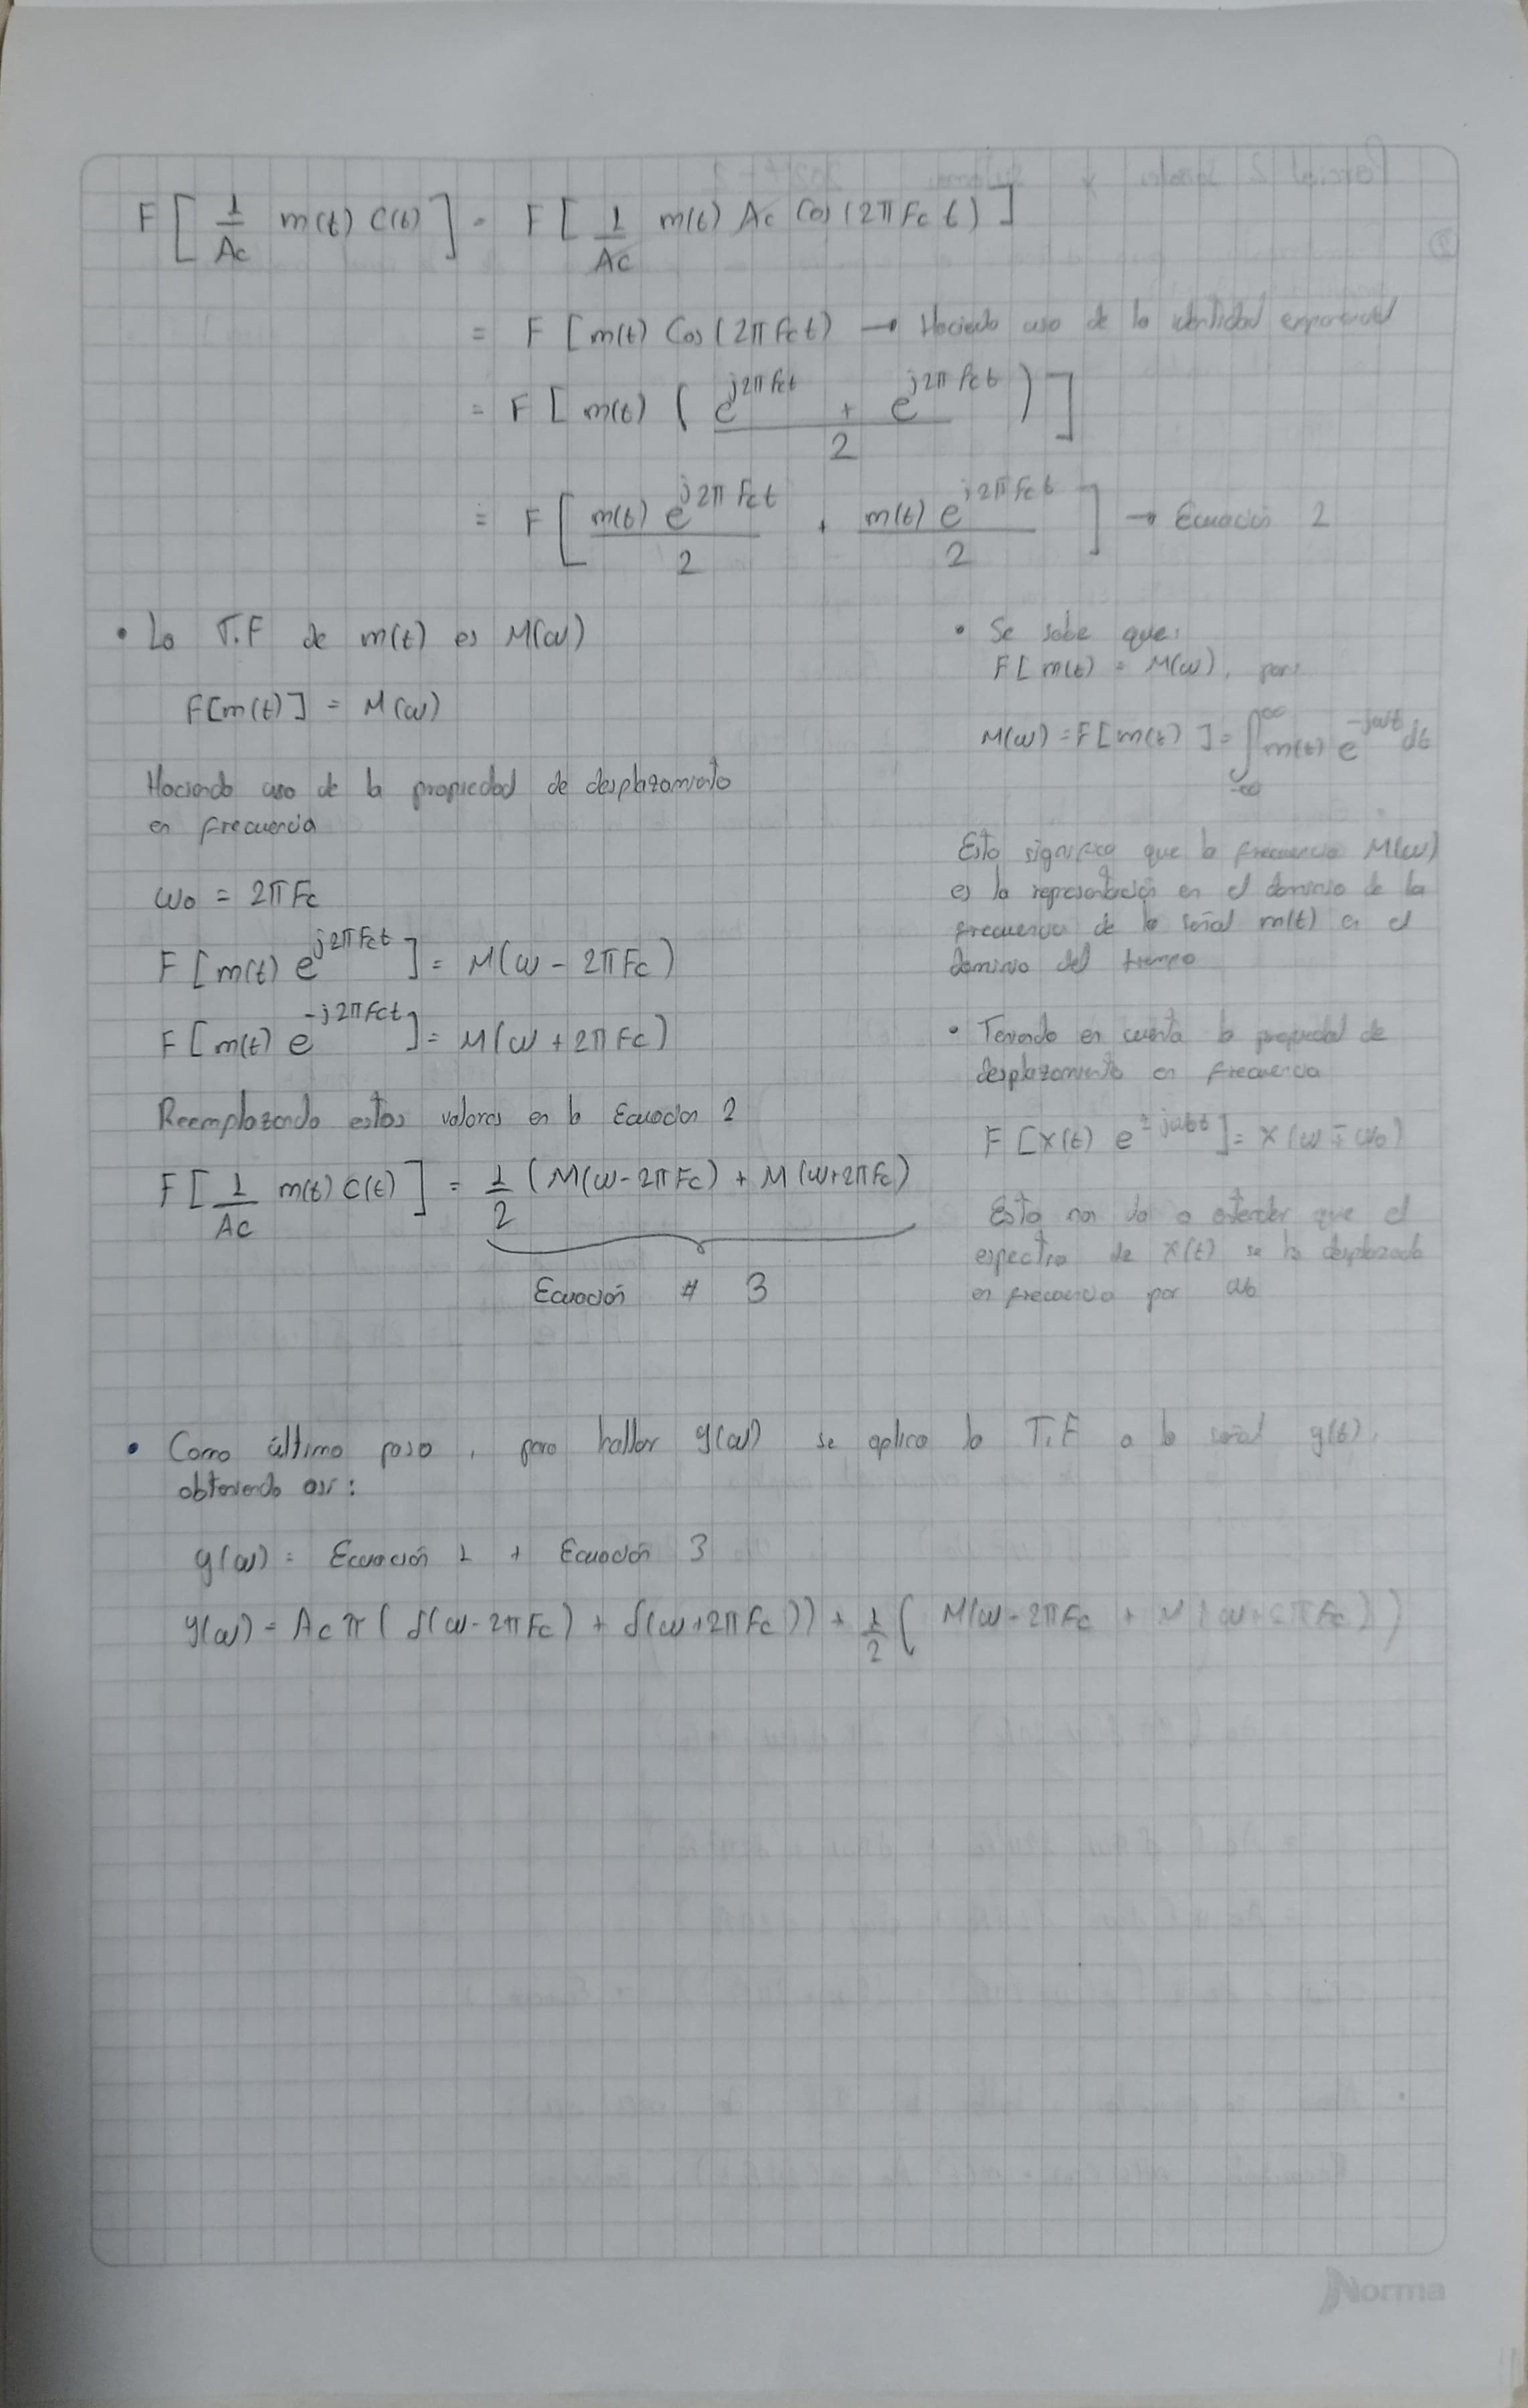

***PARTE PRACTICA***

El siguiente código permite descargar el audio de un video de YouTube en formato MP3 utilizando la biblioteca `yt-dlp`. Primero, instala las dependencias necesarias, incluyendo `yt-dlp`, que se obtiene directamente desde su repositorio en GitHub, y `soundfile`, aunque en este fragmento de código no se utiliza. Luego, importa las librerías `os` y `yt_dlp`, siendo esta última la encargada de manejar la descarga de videos y audios.   

A continuación, define la función `download_ytvid_as_mp3(video_url, name)`, que toma como entrada la URL de un video de YouTube y el nombre que se desea asignar al archivo de salida. La función extrae la información del video sin descargarlo, construye el nombre del archivo de salida en formato MP3 y configura las opciones de descarga para obtener solo el audio con la mejor calidad disponible. Posteriormente, emplea `yt_dlp.YoutubeDL(options)` para ejecutar la descarga y guardar el archivo con el nombre especificado. Finalmente, muestra un mensaje en consola indicando que la descarga ha finalizado exitosamente.


In [ ]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

     / 2.7 MB 10.9 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928467 sha256=23643b2a243238091811ead7e689f91be5ea5dcdde8cb29257864cb7316760d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-bduuppr9/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


Este fragmento de código permite descargar un archivo desde Google Drive utilizando su identificador único (`FILEID`). Primero, define el ID del archivo a descargar y luego ejecuta un comando `wget` para obtenerlo.  
  
El comando `wget` maneja las cookies necesarias para autorizar la descarga, evitando restricciones de Google Drive. Utiliza una doble solicitud: la primera obtiene un código de confirmación, y la segunda lo usa para completar la descarga.  

El archivo descargado se guarda con el nombre `canciones.xlsx`. Finalmente, se ejecuta el comando `!dir` para listar los archivos en el directorio actual. Se incluye una línea comentada para descomprimir un archivo en caso de que se necesite (`unzip -o codigos.zip`), pero no se ejecuta en este caso.


In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1DxI5wQpqEWksw2BqJnG7n0IgNQ_xByX-"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  canciones.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2025-02-04 02:05:32--  https://docs.google.com/uc?export=download&confirm=&id=1DxI5wQpqEWksw2BqJnG7n0IgNQ_xByX-
Resolving docs.google.com (docs.google.com)... 142.251.167.102, 142.251.167.139, 142.251.167.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.167.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1DxI5wQpqEWksw2BqJnG7n0IgNQ_xByX-&export=download [following]
--2025-02-04 02:05:32--  https://drive.usercontent.google.com/download?id=1DxI5wQpqEWksw2BqJnG7n0IgNQ_xByX-&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.180.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.180.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9263 (9.0K) [application/octet-stream]
Saving to: ‘canciones.xlsx’

canciones.xlsx      100%[===================>]   9.05K  --.

Este código importa las bibliotecas necesarias para el análisis de datos y visualización: `pandas` para la manipulación de datos, `numpy` para cálculos numéricos y `matplotlib.pyplot` para la generación de gráficos.  

Luego, define la variable `file_`, que almacena el nombre del archivo `canciones.xlsx`. Finalmente, usa `pd.read_excel(file_)` para leer el archivo de Excel y cargar su contenido en la variable `X`, permitiendo su posterior análisis y procesamiento.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'canciones.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)

Este fragmento de código tiene como objetivo crear una carpeta de resultados, recorrer un archivo Excel que contiene información sobre videos y realizar operaciones de descarga y conversión de audio.  
  
Primero, intenta crear una carpeta llamada `results` para guardar los archivos descargados y procesados. Si la carpeta ya existe, muestra un mensaje indicándolo.  

Luego, el código obtiene el número de filas y columnas del archivo Excel cargado previamente y calcula la cantidad de segmentos por canción (`Ns`). Posteriormente, recorre las filas del archivo Excel (en este caso, solo trabaja con el primer video) y extrae el enlace, banda y tipo de cada video.  

El nombre del archivo resultante se construye combinando el nombre de la banda, el número del video y el tipo musical, y se utiliza para descargar el video desde YouTube mediante la función `download_ytvid_as_mp3`.  

Finalmente, usa el comando `subprocess.call` para convertir el archivo MP3 descargado a formato WAV utilizando la herramienta `ffmpeg`, guardando el resultado en la misma carpeta `results`.


In [ ]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion
n = 0
print(f"video {n+1} de {N}")
print(f"link: {X.loc[n,'link']}\n")
print(f"band: {X.loc[n,'band']}\n")
print(f"type: {X.loc[n,'type']}\n")
#ruta video n-th
name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
#descargar mp3 desde youtube
download_ytvid_as_mp3(X.loc[n,'link'],name_)
#convertir a .wav
subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                name_+'.wav'])

video 1 de 16
link: https://www.youtube.com/watch?v=WdoXZf-FZyA&ab_channel=Megadeth-Topic

band: megadeth

type: metal

[youtube] Extracting URL: https://www.youtube.com/watch?v=WdoXZf-FZyA&ab_channel=Megadeth-Topic
[youtube] WdoXZf-FZyA: Downloading webpage
[youtube] WdoXZf-FZyA: Downloading tv client config
[youtube] WdoXZf-FZyA: Downloading player 0f7c1eff
[youtube] WdoXZf-FZyA: Downloading tv player API JSON
[youtube] WdoXZf-FZyA: Downloading ios player API JSON
[youtube] WdoXZf-FZyA: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=WdoXZf-FZyA
[youtube] WdoXZf-FZyA: Downloading webpage
[youtube] WdoXZf-FZyA: Downloading tv client config
[youtube] WdoXZf-FZyA: Downloading player 0f7c1eff
[youtube] WdoXZf-FZyA: Downloading tv player API JSON
[youtube] WdoXZf-FZyA: Downloading ios player API JSON
[youtube] WdoXZf-FZyA: Downloading m3u8 information
[info] WdoXZf-FZyA: Downloading 1 format(s): 251
[download] Destination: results/megadeth_0_1.mp3
[d

0

Este fragmento de código tiene como objetivo cargar los archivos de audio en formato `.wav` y listarlos para su posterior procesamiento.  

Primero, define la variable `path` que contiene la ruta de la carpeta `results/`, donde se encuentran los archivos `.wav` generados previamente. Luego, utiliza una comprensión de lista para recorrer los archivos de la carpeta y seleccionar solo aquellos que tienen la extensión `.wav`. El resultado se guarda en la lista `wav_files`. Finalmente, muestra la lista de archivos `.wav` encontrados en la carpeta `results/`.


In [ ]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['megadeth_0_1.wav']

Este comando instala la biblioteca `soundfile` en el entorno de Python. `soundfile` es una librería utilizada para leer y escribir archivos de audio en varios formatos, como WAV y FLAC. La instalación se realiza mediante el gestor de paquetes `pip`, y al ejecutar este comando, se asegura que `soundfile` esté disponible para su uso en el código posterior.


In [ ]:
!pip install soundfile #instalar sondfile

Este fragmento de código tiene como objetivo leer los archivos de audio `.wav` de la carpeta `results/`, segmentarlos en partes específicas de tiempo y almacenarlos en un arreglo de `numpy`.  

Primero, se establece una frecuencia de muestreo `fs` de 48,000 Hz y un vector `tl` que contiene el tiempo inicial de los segmentos a extraer (en este caso, 20 segundos). Luego, se define el tamaño de cada segmento (`ts`) en 5 segundos y se calcula la cantidad total de segmentos (`Ns`) multiplicando el número de archivos `.wav` por la longitud de `tl`.  
  
Se crea una matriz `x_t` de ceros, que contendrá los segmentos de audio extraídos, con dimensiones correspondientes a `Ns` segmentos, la cantidad de muestras por segmento, y dos canales (estéreo). También se define un vector `label` para almacenar la etiqueta del tipo de género musical y una lista `name_c` para los nombres de los archivos sin la extensión.  

El bucle recorre los archivos `.wav` en la carpeta `results/`, lee cada archivo con `soundfile.read()` y extrae los segmentos de audio en función de los tiempos definidos en `tl`. Los segmentos se almacenan en la matriz `x_t`, y se asigna una etiqueta a cada segmento según el nombre del archivo (el género musical se extrae del penúltimo carácter del nombre del archivo). Finalmente, se imprime información sobre la lectura y el segmento procesado en cada iteración.  
  
Al finalizar, se muestra la forma (dimensiones) de la matriz `x_t` para verificar la correcta carga y segmentación de los archivos de audio.


In [ ]:
import soundfile as sf # para instalar pip install soundfile
#leer archivos y crear np.array audios
fs = 48000
tl = np.array([20])
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name)
    for ti in tl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
        label[i] = int(name[-5]) #tipo de genero
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
        i+=1
x_t.shape

0 lectura: megadeth_0_1.wav; segundo 20:25; tipo música [1.]


(1, 240000, 2)

Este fragmento de código permite reproducir un segmento de audio a partir de la matriz `x_t`.  

Primero, importa la función `Audio` desde la librería `IPython.display`, que es útil para reproducir archivos de audio en entornos interactivos, como Jupyter Notebooks. Luego, utiliza `Audio(x_t[0].T, rate=fs)` para reproducir el primer segmento de audio almacenado en `x_t`. El índice `0` hace referencia al primer segmento, y la transposición `.T` asegura que los datos de audio estén en la forma adecuada para ser reproducidos (ya que `x_t` tiene dos canales, uno para cada altavoz en estéreo). La frecuencia de muestreo `fs` se establece en 48,000 Hz, lo que permite reproducir el audio a la tasa correcta.


In [ ]:
from IPython.display import Audio #reproducir segmento
Audio(x_t[0].T,rate=fs)

Este fragmento de código selecciona el primer canal de audio del primer segmento en la matriz `x_t` para realizar un procesamiento posterior, como la modulación.  

Primero, se extrae el primer canal del primer segmento de audio en `x_t` utilizando el índice `[0,:,0]`, lo que selecciona todos los puntos de la primera dimensión (muestras) del primer segmento de audio y solo el primer canal (canal izquierdo, por ejemplo). El resultado se guarda en la variable `xm`. Finalmente, `xm.shape` se utiliza para mostrar las dimensiones de la señal extraída, permitiendo verificar que se haya realizado correctamente la selección del canal y las muestras.


In [ ]:
#tomamos canal 1 para generar la modulación
xm = x_t[0,:,0]
xm.shape

(240000,)

Este fragmento de código tiene como objetivo generar una señal portadora para la modulación.  
  
Primero, se define la frecuencia de la portadora `Fc` como 15,000 Hz y se crea un vector de tiempo `t` utilizando `np.arange()`, que abarca el intervalo de tiempo del segmento de audio (de 0 a `ts` segundos), con una resolución de muestreo definida por `fs` (48,000 Hz).  

Luego, se define un índice de modulación `Im` con un valor de 0.5, que se utiliza para calcular la amplitud de la portadora (`Ac`) con la fórmula `Ac = max(abs(xm)) / Im`, donde `max(abs(xm))` devuelve el valor máximo absoluto de la señal de audio, y el índice de modulación ajusta esta amplitud.  

Posteriormente, se genera la portadora `c` como una señal cosenoidal con la fórmula `c = Ac * np.cos(2 * np.pi * Fc * t)`, utilizando la amplitud calculada `Ac` y la frecuencia de portadora `Fc`. Esto crea una señal portadora que será utilizada en un esquema de modulación. Finalmente, se imprime el valor de `Ac`, que es la amplitud de la portadora.


In [ ]:
Fc = 15000 #frecuencia de portadora
t = np.arange(0,ts,1/fs) #vector del tiempo
Im = 0.5 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(xm))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #portadora
print(Ac)

2.0


Este fragmento de código genera y muestra una gráfica de la señal portadora y la señal de mensaje en función del tiempo.  

Se utilizan las funciones de `matplotlib` para crear la visualización. Primero, `plt.plot(t, c, label='portadora')` dibuja la señal portadora `c` en función del tiempo `t`, con la etiqueta "portadora" para la leyenda. Luego, `plt.plot(t, xm, label='mensaje')` dibuja la señal de mensaje `xm` (el primer canal del audio) en función del mismo vector de tiempo `t`, con la etiqueta "mensaje" en la leyenda.  

Se añaden etiquetas a los ejes utilizando `plt.xlabel('t [s]')` y `plt.ylabel('Amplitud')` para indicar que el eje x representa el tiempo en segundos y el eje y la amplitud de las señales. Finalmente, `plt.legend()` se utiliza para mostrar la leyenda en la gráfica, y `plt.show()` muestra la gráfica resultante.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


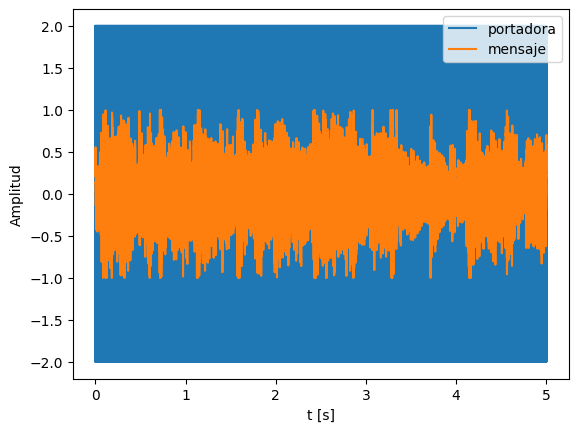

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,xm,label='mensaje')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

Este fragmento de código se utiliza para reproducir la señal portadora generada previamente.  

Se utiliza la función `Audio(c, rate=fs)` de `IPython.display` para reproducir la señal `c` (la portadora), con una tasa de muestreo de `fs` (48,000 Hz). La función `Audio` convierte la señal en formato de audio para que pueda ser reproducida directamente en entornos interactivos como Jupyter Notebooks. El parámetro `rate=fs` asegura que la señal se reproduzca con la frecuencia de muestreo adecuada, manteniendo la calidad original de la señal generada.


In [ ]:
Audio(c,rate=fs) #reproducir portadora

Este fragmento de código genera la señal modulada en amplitud (AM) y la visualiza en función del tiempo.  

La señal modulada `y` se calcula mediante la fórmula $\ y(t) = \left( 1 + \frac{x_m}{A_c} \right) c $, donde `xm` es la señal de mensaje (el primer canal del audio), `Ac` es la amplitud de la portadora, y `c` es la portadora generada previamente. La expresión modula la amplitud de la portadora en función del mensaje.  

Después, se utiliza `plt.plot(t, y)` para graficar la señal modulada `y` en función del tiempo `t`. Se añaden etiquetas a los ejes con `plt.xlabel('$t[s]$')` para el tiempo en segundos y `plt.ylabel('$y(t)$')` para la señal modulada. Finalmente, `plt.show()` muestra la gráfica resultante de la señal modulada.


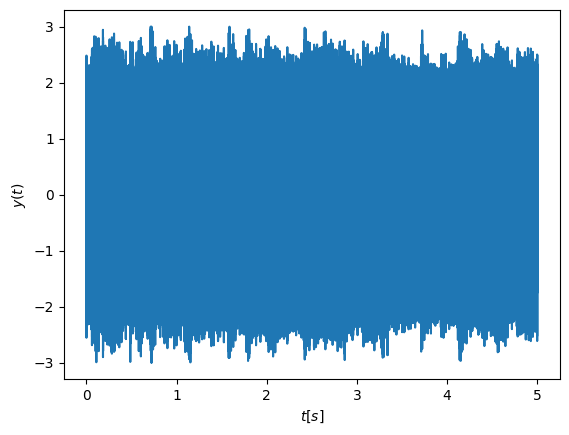

In [ ]:
y = (1+xm/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

Este fragmento de código se utiliza para reproducir la señal modulada en amplitud (AM) generada previamente.  

Se utiliza la función `Audio(y, rate=fs)` de `IPython.display` para reproducir la señal modulada `y`, con una tasa de muestreo de `fs` (48,000 Hz). Al igual que en el caso de la portadora, la función `Audio` convierte la señal en formato de audio para que pueda ser reproducida directamente en entornos interactivos como Jupyter Notebooks. El parámetro `rate=fs` asegura que la señal se reproduzca con la frecuencia de muestreo adecuada, manteniendo la calidad original de la señal modulada.


In [ ]:
Audio(y,rate=fs) #reproducir modulada

Este fragmento de código calcula y visualiza los espectros de frecuencia de la portadora, la señal de mensaje y la señal modulada en amplitud (AM).  

Se utilizan las funciones de la librería `numpy.fft` para calcular las transformadas rápidas de Fourier (FFT) de las señales. `Xfc = np.fft.fft(c)` calcula la FFT de la señal portadora `c`, `Xfm = np.fft.fft(xm)` calcula la FFT de la señal de mensaje `xm`, y `Xfy = np.fft.fft(y)` calcula la FFT de la señal modulada `y`.  

La función `np.fft.fftfreq(len(c), 1/fs)` se utiliza para calcular las frecuencias correspondientes a las componentes espectrales de las señales, donde `fs` es la frecuencia de muestreo.  

Finalmente, se generan tres gráficos de las magnitudes de las transformadas de Fourier de las tres señales utilizando `plt.plot()`. Se trazan las magnitudes de `Xfy`, `Xfm` y `Xfc` en función de las frecuencias `vfre`. Se añaden etiquetas a la leyenda con `plt.legend()`, y las etiquetas de los ejes son añadidas con `plt.xlabel('$f [Hz]$')` para la frecuencia en Hz y `plt.ylabel('$|X(f)|$')` para la magnitud de las componentes espectrales. El rango del eje y se ajusta con `plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])` para centrarse en las frecuencias relevantes. Finalmente, `plt.show()` muestra la gráfica resultante.


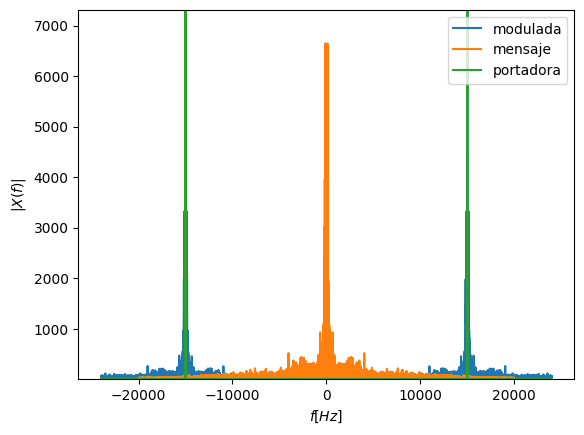

In [ ]:
#calculo de espectros
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(xm)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/fs)

plt.plot(vfre,abs(Xfy),label='modulada')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

# **PREGUNTA 3**

**Consulte en que consiste la distorsión total de armónicos (Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito eléctrico. Como puede calcularse el THD desde la FFT?. Como puede calcularse la distorsión del factor de potencia con base al THD?. Genere un ejemplo ilustrativo para el cálculo del THD y la distorsión del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones. El usuario podrá escoger diferentes valores de R y C.**

**Distorsión Total de Armónicos:** La Distorsión Total de Armónicos (THD, por sus siglas en inglés: Total Harmonic Distortion) es una medida de la distorsión que afecta a una señal debido a la presencia de armónicas. Las armónicas son componentes de frecuencia múltiplos enteros de la frecuencia fundamental de una señal. En un sistema eléctrico ideal, las señales de voltaje y corriente son senoidales (es decir, tienen solo una frecuencia fundamental). Sin embargo, debido a la no linealidad de algunos equipos, como rectificadores, motores o dispositivos electrónicos, se generan armónicas que distorsionan la forma de onda original.

El THD se calcula como la relación entre la potencia de las armónicas y la potencia de la frecuencia fundamental. De manera más formal, el THD es:

$$THD = \frac{\sqrt{A_2^2 + A_3^2 + A_4^2 + \dots}}{A_1}$$

Donde:

- $A_1$ es la amplitud de la frecuencia fundamental (la frecuencia más baja).
- $A_n$ son las amplitudes de las armónicas (componentes de frecuencias múltiplos de la frecuencia fundamental).

El THD se expresa como un porcentaje, y cuanto mayor es el THD, mayor es la distorsión de la señal. Un THD bajo indica que la señal es muy parecida a una onda sinusoidal ideal, mientras que un THD alto sugiere una mayor distorsión, lo que puede llevar a una mayor generación de calor y pérdidas de eficiencia en equipos eléctricos.

-------------------------------

**Factor de Potencia (FP):** El factor de potencia es una medida de la eficiencia con la que un circuito eléctrico utiliza la energía suministrada. En términos sencillos, es la relación entre la potencia activa (o real) $P$ y la potencia aparente $S$, y se expresa como:

$$FP = \frac{P}{S} = \cos(\theta)$$

Donde:

- **P** es la potencia activa (en vatios), que es la energía que realiza trabajo útil en el circuito (por ejemplo, mueve un motor o ilumina una lámpara).
- **S** es la potencia aparente (en voltamperios), que es la potencia total suministrada al circuito, que incluye tanto la potencia activa como la potencia reactiva (debida a componentes inductivos y capacitivos).
- **θ** es el ángulo de desfase entre la corriente y el voltaje.

El factor de potencia tiene un valor entre 0 y 1, y es más cercano a 1 cuando la corriente y el voltaje están alineados en fase (como en una carga resistiva pura). Un factor de potencia bajo indica una mayor presencia de potencia reactiva, lo que significa que parte de la energía no se está utilizando de manera efectiva.

---------------------

Para calcular el THD desde la FFT, se realiza el siguiente proceso:

1. Aplicar la FFT a la señal para obtener las amplitudes de las frecuencias presentes.
2. Identificar la frecuencia fundamental $A_1$ y las armónicas $A_2$, $A_3$, $A_4$, ....

----------------------

El THD (Distorsión Total de Armónicos) puede afectar el factor de potencia en un circuito eléctrico, ya que las armónicas introducen un desfase adicional entre la corriente y el voltaje. Un mayor THD generalmente indica una mayor distorsión, lo que reduce el factor de potencia.

Relación entre THD y el factor de potencia:
El factor de potencia distorsionado (FP
distorsionado) se puede calcular aproximando la fórmula:

$$FP_{distorsionado} \approx \frac{FP_{ideal}}{\sqrt{1 + THD^2}}$$

Donde:

- FP ideal es el factor de potencia sin armónicas (idealmente 1).
-THD es la distorsión total de armónicos en la señal (como un valor decimal).

>EJEMPLO RESISTIVO

Este fragmento de código importa varios paquetes necesarios para realizar simulaciones y análisis numéricos en Python.  

- **`numpy`**: Se utiliza para la manipulación de arrays y operaciones matemáticas en general.  
- **`scipy`**: Contiene funciones y algoritmos adicionales para la computación científica, especialmente en el ámbito de señales, optimización y estadísticas.  
- **`matplotlib.pyplot`**: Es una biblioteca para la visualización de datos en gráficos.  
- **`scipy.signal`**: Se utiliza para trabajar con señales, incluyendo filtros, transformadas, y análisis de señales.  
- **`scipy.optimize`**: Proporciona métodos para la optimización de funciones, útil para encontrar valores que minimicen o maximicen una función objetivo.  
- **`sympy`**: Se utiliza para el cálculo simbólico, permitiendo la manipulación de expresiones matemáticas de manera algebraica. Aunque se encuentra importado en el código, no se está utilizando activamente en este fragmento, y la línea de inicialización `sym.init_session()` está comentada.

In [ ]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

Este código define y representa un sistema resistivo en el dominio de Laplace utilizando la librería `sympy` de Python, que permite trabajar con matemáticas simbólicas. Primero, se importan las herramientas necesarias de `sympy` y se definen las variables simbólicas `s` (la variable compleja en el dominio de Laplace) y `R` (la resistencia del circuito, que es una constante positiva). Luego, se crea una función simbólica `X(s)`, que representa la entrada del sistema en el dominio de Laplace. La salida del sistema, `Y(s)`, se define como el producto de $ \frac{1}{R} $ por la entrada `X(s)`, lo que refleja una relación directa y lineal en un sistema resistivo. Finalmente, se muestra la función de transferencia $Y(s) = \frac{1}{R} \cdot X(s)$, que representa cómo la salida está relacionada con la entrada en el dominio de Laplace. Este modelo es una simplificación de un circuito resistivo, donde la salida es una versión escalada de la entrada por el factor \( \frac{1}{R} \).


In [ ]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = (1 / R) * X
Y

X(s)/R

Este código realiza una sustitución simbólica en la expresión de la salida \( Y(s) \) que definimos previamente. Aquí están los pasos:

- Se asigna el valor de 1000 a la variable `R_v`, que representa el valor de la resistencia en la simulación.
- Luego, la expresión simbólica de $ Y(s) $, que contiene la variable \( R \), se evalúa sustituyendo \( R \) por el valor de `R_v` (1000) utilizando el método `subs` de `sympy`.
- Finalmente, la expresión resultante, que ahora tiene el valor numérico de \( R \), se guarda en la variable `Y_RC`.

In [ ]:
R_v = 1000 #valores de simulacion de R
Y_RC = Y.subs(R, R_v)
Y_RC

X(s)/1000

Este código define una función de transferencia en el dominio de Laplace para un sistema resistivo, y realiza los siguientes pasos:

- **Coeficientes del Numerador (`num`)**:
   - Se define un arreglo de coeficientes para el numerador de la función de transferencia. En este caso, el numerador es simplemente un valor constante de 1, que corresponde a un sistema de ganancia unitaria.

- **Coeficientes del Denominador (`den`)**:
   - Se define un arreglo de coeficientes para el denominador de la función de transferencia. El denominador se define como un arreglo que contiene el valor de \( R_v \) (resistencia de la simulación) seguido de un 1. Este formato corresponde a una función de transferencia de la forma \( \frac{1}{R \cdot s + 1} \), donde \( R \) es la resistencia.

- **Creación de la Función de Transferencia (`G_n`)**:
   - Se utiliza la librería `scipy.signal` (`sig`) para crear la función de transferencia utilizando los coeficientes del numerador y el denominador definidos anteriormente. El objeto `G_n` es ahora la representación del sistema en el dominio de Laplace.

- **Impresión de los Coeficientes**:
   - Se imprimen los coeficientes del numerador (`num`) y del denominador (`den`) para verificar que se han definido correctamente.

In [ ]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[1000    1]


Este código simula la señal de entrada y salida de un sistema con un rectificador, utilizando un sistema de transferencia definido previamente.

- **Parámetros de la señal de entrada:**
   - `Fo = 60`: Se define la frecuencia de alimentación de la señal (60 Hz).
   - `Fs = 30 * Fo`: La frecuencia de muestreo se define como 30 veces la frecuencia de alimentación (1800 Hz).
   - `To = 1 / Fo`: El periodo fundamental de la señal es el inverso de la frecuencia de alimentación.
   - `Ts = 1 / Fs`: El periodo de muestreo es el inverso de la frecuencia de muestreo.
   - `t = np.arange(0, 5*To, Ts)`: Se genera un vector de tiempo `t` que abarca 5 periodos de la señal de alimentación, con un muestreo a intervalos de `Ts`.

- **Generación de la señal de entrada:**
   - `A = 120`: La amplitud de la señal de entrada es 120 V.
   - `in_o = A * (np.sin(2 * np.pi * Fo * t))`: Se crea una onda senoidal con la frecuencia de alimentación `Fo` y la amplitud `A`.
   
- **Generación de la señal rectificada:**
   - `rec_c = sig.square(2 * np.pi * Fo * t)`: Se genera un tren de pulsos cuadrado a la frecuencia de alimentación para simular la rectificación completa.
   - Para un **rectificador de media onda**: `rec_m = 0.5 * (sig.square(2 * np.pi * Fo * t) + 1)`, que produce una señal que solo se activa en la mitad del ciclo de la onda.
   - `in_ = in_o * rec_c`: Se calcula la señal de entrada rectificada completa multiplicando la onda senoidal `in_o` por el tren de pulsos `rec_c`. Si se quiere probar con rectificador de media onda, se usaría `rec_m` en lugar de `rec_c`.

- **Evaluación de la salida del sistema:**
   - `out = G_n.output(in_, T=t)[1]`: Se evalúa la salida del sistema (definido por `G_n`) a la señal de entrada rectificada utilizando la aproximación numérica de `scipy.signal`. La salida corresponde a la respuesta del sistema ante la entrada rectificada.



In [ ]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
#Para rectificador de media onda:
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)
in_ = in_o * rec_c #si se quiere probar con rec media onda multiplicar por rec_m
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

Este código genera una gráfica para visualizar la señal de alimentación (`in_o`), que es una onda senoidal. Utiliza la librería `matplotlib` para graficar.

- **`plt.plot(t, in_o, label='Alimentación')`:** Se traza la señal de entrada `in_o` con respecto al tiempo `t`, y se le asigna la etiqueta `'Alimentación'` en la leyenda.
   
- **`plt.legend()`:** Esto muestra la leyenda en la gráfica, la cual incluye la etiqueta definida en el paso anterior.

- **`plt.show()`:** Muestra la gráfica generada en pantalla, permitiendo ver la señal de alimentación.


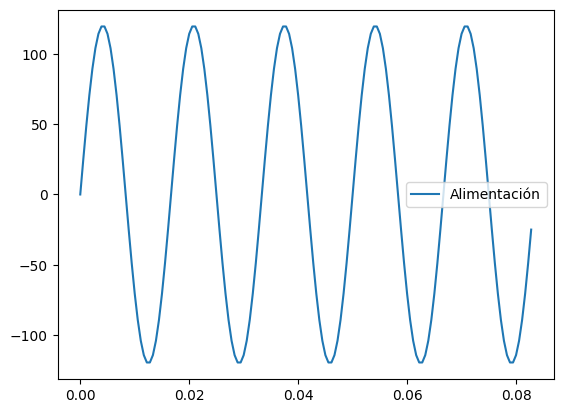

In [ ]:
#señales de alimentación y tren de pulsos
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

Este bloque de código genera una gráfica para visualizar el **tren de pulsos** (`rec_c`) en función del tiempo (`t`).

- **`plt.plot(t, rec_c, label='Tren Pulsos')`:** Se traza el tren de pulsos `rec_c` con respecto al tiempo `t`, y se le asigna la etiqueta `'Tren Pulsos'` en la leyenda.

- **`plt.legend()`:** Esto muestra la leyenda en la gráfica, que incluye la etiqueta definida en el paso anterior.

- **`plt.show()`:** Muestra la gráfica generada en pantalla, permitiendo observar el tren de pulsos a lo largo del tiempo.


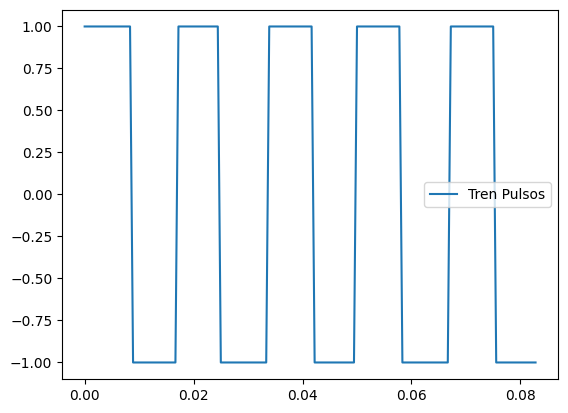

In [ ]:
plt.plot(t,rec_c,label='Tren Pulsos')
plt.legend()
plt.show()

Este bloque de código genera una gráfica que compara la **entrada rectificada** (`in_`) y la **salida del circuito** (`out`) en función del tiempo (`t`).

- **`plt.plot(t, in_, label='In(t)')`:** Se traza la entrada rectificada `in_` con respecto al tiempo `t` y se le asigna la etiqueta `'In(t)'` en la leyenda.

- **`plt.plot(t, out, label='Out(t)')`:** Se traza la salida del circuito `out` con respecto al tiempo `t` y se le asigna la etiqueta `'Out(t)'` en la leyenda.

- **`plt.xlabel('t [s]')`:** Se etiqueta el eje horizontal (tiempo) como `t [s]`.

- **`plt.ylabel('out(t)')`:** Se etiqueta el eje vertical (amplitud de la señal de salida) como `out(t)`.

- **`plt.show()`:** Muestra la gráfica generada en pantalla, permitiendo observar cómo varían tanto la entrada rectificada como la salida del circuito a lo largo del tiempo.


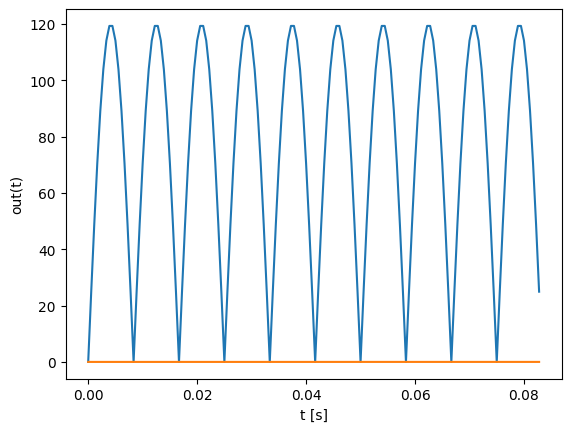

In [ ]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

Este bloque de código realiza el **análisis espectral** de la salida del circuito utilizando la **Transformada Rápida de Fourier (FFT)** y grafica el **espectro de frecuencias** de la señal de salida (`out`).

- **`vfre = np.fft.rfftfreq(len(out), 1/Fs)`:** Calcula el vector de frecuencias (`vfre`) en Hertz, que depende del tamaño del vector de datos `out` y la frecuencia de muestreo `Fs`. Esta función devuelve las frecuencias para las cuales se computarán los componentes espectrales.

- **`Xf = np.fft.rfft(out)`:** Calcula la Transformada Rápida de Fourier (FFT) de la señal `out`, que es la salida del circuito. El uso de `rfft` es adecuado para señales reales, ya que solo devuelve la mitad positiva del espectro.

- **`plt.stem(vfre, abs(Xf / len(out)))`:** Utiliza `plt.stem` para graficar el espectro de frecuencias. Se muestra la magnitud de la FFT normalizada (`abs(Xf / len(out))`), lo que permite ver la distribución de energía en el dominio de la frecuencia.

- **`plt.xlabel('Frecuencia [Hz]')`:** Etiqueta el eje horizontal como `Frecuencia [Hz]`, que representa las frecuencias en Hertz.

- **`plt.ylabel('X(f)')`:** Etiqueta el eje vertical como `X(f)`, que representa la magnitud de la FFT (espectro de la señal).

- **`plt.show()`:** Muestra la gráfica generada, que permite visualizar cómo se distribuyen las componentes de frecuencia en la salida del circuito.

Este código proporciona una visualización de las frecuencias presentes en la señal de salida del circuito, lo que es útil para analizar las características espectrales del sistema.


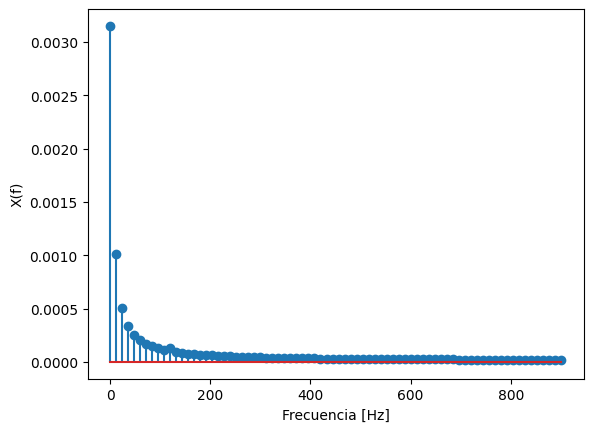

In [ ]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.stem(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('X(f)')
plt.show()

>EJEMPLO RESISTIVO CAPACITIVO

Este fragmento de código importa varios paquetes necesarios para realizar simulaciones y análisis numéricos en Python.  

- **`numpy`**: Se utiliza para la manipulación de arrays y operaciones matemáticas en general.  
- **`scipy`**: Contiene funciones y algoritmos adicionales para la computación científica, especialmente en el ámbito de señales, optimización y estadísticas.  
- **`matplotlib.pyplot`**: Es una biblioteca para la visualización de datos en gráficos.  
- **`scipy.signal`**: Se utiliza para trabajar con señales, incluyendo filtros, transformadas, y análisis de señales.  
- **`scipy.optimize`**: Proporciona métodos para la optimización de funciones, útil para encontrar valores que minimicen o maximicen una función objetivo.  
- **`sympy`**: Se utiliza para el cálculo simbólico, permitiendo la manipulación de expresiones matemáticas de manera algebraica. Aunque se encuentra importado en el código, no se está utilizando activamente en este fragmento, y la línea de inicialización `sym.init_session()` está comentada.


In [ ]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

> Este fragmento de código utiliza la librería **`sympy`** para trabajar con cálculos simbólicos en Python.  

- Se define una variable compleja `s` como un símbolo, lo que permite su uso en expresiones algebraicas y ecuaciones diferenciales.  
- Luego, se definen los símbolos `t`, `R`, `L`, y `C` como variables positivas, que podrían representar tiempo, resistencia, inductancia y capacitancia, respectivamente.  
- **`X`** es una función simbólica en `s`, creada mediante `sym.Function('X')(s)`, que se representa como una función dependiente de la variable compleja `s`.  
- La variable **`Y`** se define como una expresión en términos de `X`, donde se realiza una relación simbólica en el dominio de Laplace. En esta expresión, se muestra una relación de transferencia de un circuito RC con la forma \( Y = \frac{1}{R C s + 1} \cdot X \).  
- Finalmente, la expresión de **`Y`** se evalúa y se muestra como salida.  


In [ ]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R*C*s + 1) * X
Y

X(s)/(C*R*s + 1)

Este bloque de código realiza una **sustitución de valores numéricos** en la expresión simbólica previamente definida para **`Y`**.  

- **`R_v = 1000`**: Se asigna el valor 1000 a la resistencia \( R \) en ohmios, como parte de los valores de simulación.  
- **`C_v = 10e-6`**: Se asigna el valor \( 10 \times 10^{-6} \) a la capacitancia \( C \) en faradios, también para los fines de la simulación.  
- **`Y_RC = Y.subs(R, R_v).subs(C, C_v)`**: Se sustituyen los valores numéricos de \( R \) y \( C \) en la expresión simbólica de **`Y`**, reemplazando \( R \) por 1000 y \( C \) por $ 10 \times 10^{-6}$.  
- El resultado de esta sustitución es **`Y_RC`**, una expresión con valores numéricos, que representa la relación de transferencia del circuito con los valores específicos de \( R \) y \( C \).


In [ ]:
R_v = 1000 #valores de simulacion de R
C_v =  10e-6 # valores de simulacion de C
Y_RC = Y.subs(R, R_v).subs(C, C_v)
Y_RC


X(s)/(0.01*s + 1)

En este bloque de código, se define y se crea una **función de transferencia** utilizando la librería `scipy.signal`.  

- **`num = np.array([1])`**: Define un arreglo **`num`** con el coeficiente del numerador de la función de transferencia, en este caso solo tiene un valor \( 1 \).  
- **`den = np.array([R_v*C_v, 1])`**: Define un arreglo **`den`** que contiene los coeficientes del denominador de la función de transferencia. Utiliza los valores de \( R_v \) y \( C_v \) definidos previamente, de modo que el primer coeficiente es \( R_v \cdot C_v \) (el producto de la resistencia y la capacitancia), y el segundo coeficiente es \( 1 \).  
- **`G_n = sig.TransferFunction(num, den)`**: Crea una **función de transferencia** **`G_n`** utilizando los coeficientes del numerador y denominador previamente definidos.  
- El código luego imprime los coeficientes **`num`** y **`den`** en la consola, para verificar que los valores han sido asignados correctamente.


In [ ]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v*C_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[0.01 1.  ]


En este bloque de código se simula una señal de entrada para un sistema con una función de transferencia y se evalúa su salida. Los elementos clave son:

- **`Fo = 60`**: Define la **frecuencia de alimentación** de \( 60 \, \text{Hz} \).
- **`Fs = 30*Fo`**: Define la **frecuencia de muestreo** como 30 veces la frecuencia de alimentación, es decir, \( 1800 \, \text{Hz} \).
- **`To = 1/Fo`**: Calcula el **periodo fundamental** como el inverso de la frecuencia de alimentación.
- **`Ts = 1/Fs`**: Calcula el **periodo de muestreo** como el inverso de la frecuencia de muestreo.
- **`t = np.arange(0, 5*To, Ts)`**: Define un arreglo de tiempo **`t`** que simula 5 períodos de la señal de alimentación, con un muestreo según el periodo de muestreo **`Ts`**.
- **`A = 120`**: Define la **amplitud** de la señal de entrada como $120 \, \text{V} $.
- **`in_o = A*(np.sin(2*np.pi*Fo*t))`**: Define la señal de entrada aproximada como una **onda senoidal** de frecuencia \( Fo \) y amplitud \( A \).
- **`rec_c = sig.square(2*np.pi*Fo*t)`**: Define una señal de **tren de pulsos** como función cuadrada de la misma frecuencia que la señal de entrada.
- **`rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)`**: Define la señal para un **rectificador de media onda**, que toma valores de \( 0 \) y \( 1 \) en función de la frecuencia de alimentación.
- **`in_ = in_o * rec_c`**: Multiplica la señal de entrada senoidal por la señal de tren de pulsos para obtener la señal rectificada completa (si se desea un rectificador de media onda, se debe multiplicar por **`rec_m`** en lugar de **`rec_c`**).
- **`out = G_n.output(in_, T=t)[1]`**: Evalúa la **salida** del sistema utilizando la función de transferencia **`G_n`**, considerando la entrada rectificada y utilizando la aproximación numérica de `scipy`.


In [ ]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
#Para rectificador de media onda:
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)
in_ = in_o * rec_c #si se quiere probar con rec media onda multiplicar por rec_m
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

Este código genera una gráfica que muestra la señal de alimentación (`in_o`), que es una onda senoidal rectificada completa, utilizando la librería `matplotlib` para graficar. En primer lugar, se crea la señal de alimentación a partir de una onda senoidal multiplicada por un tren de pulsos (`rec_c`), lo que produce una señal rectificada completa. Luego, `plt.plot(t, in_o, label='Alimentación')` se utiliza para trazar esta señal con respecto al tiempo (`t`), y se etiqueta como "Alimentación" en la leyenda de la gráfica. Finalmente, `plt.show()` muestra la gráfica resultante en pantalla.


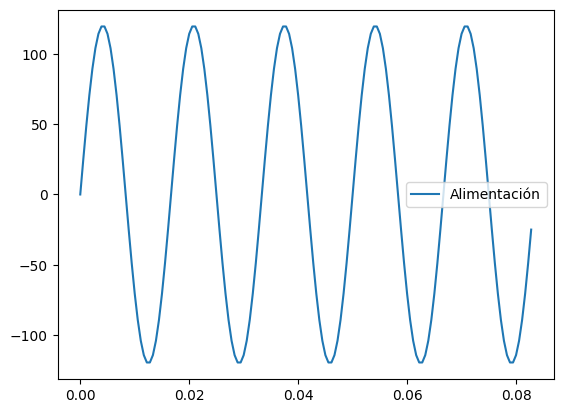

In [ ]:
#señales de alimentación y tren de pulsos
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

Este código genera una gráfica que muestra el tren de pulsos (`rec_c`) utilizando la librería `matplotlib`. La señal `rec_c` es una onda cuadrada que simula la rectificación completa de una señal. La función `plt.plot(t, rec_c, label='Tren Pulsos')` se utiliza para trazar esta señal en función del tiempo (`t`), y se etiqueta como "Tren Pulsos" en la leyenda de la gráfica. Finalmente, `plt.show()` muestra la gráfica resultante en pantalla.

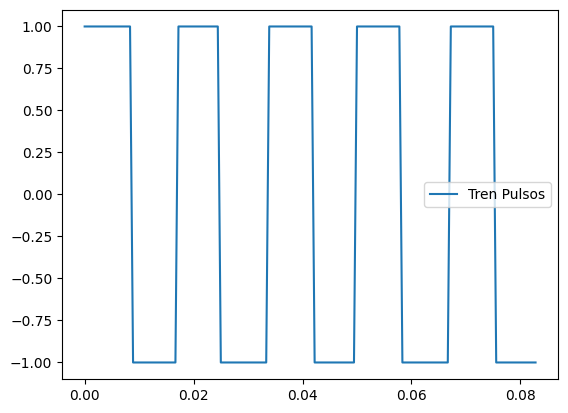

In [ ]:
plt.plot(t,rec_c,label='Tren Pulsos')
plt.legend()
plt.show()

Este código genera una gráfica que muestra tanto la señal de entrada rectificada (`in_`) como la salida del circuito (`out`) en función del tiempo. Se traza primero la señal de entrada (`in_`) utilizando `plt.plot(t, in_, label='In(t)')` y luego la señal de salida (`out`) con `plt.plot(t, out, label='Out(t)')`. Ambas señales se etiquetan adecuadamente en la leyenda de la gráfica. Las etiquetas de los ejes X e Y se configuran para indicar que el eje X representa el tiempo en segundos (`t [s]`) y el eje Y representa la salida del circuito (`out(t)`). Finalmente, `plt.show()` muestra la gráfica resultante en pantalla.


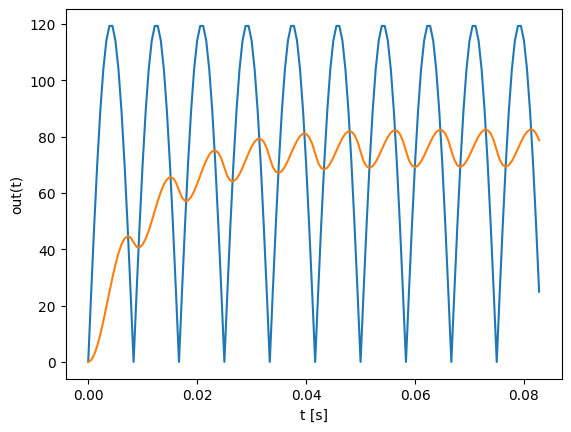

In [ ]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

Este código realiza un análisis espectral de la señal de salida del circuito (`out`). Primero, se calcula el vector de frecuencias en Hertz (`vfre`) utilizando la función `np.fft.rfftfreq`, que genera un arreglo de frecuencias positivas según el tamaño de la señal de salida y el tiempo de muestreo (`1/Fs`). Luego, se calcula la transformada rápida de Fourier de la señal de salida (`Xf`) utilizando `np.fft.rfft`. Posteriormente, la gráfica de la magnitud del espectro de frecuencias se genera mediante `plt.stem`, donde se traza la magnitud de la transformada de Fourier normalizada por la longitud de la señal (`abs(Xf/len(out))`). Los ejes X e Y de la gráfica se etiquetan como "Frecuencia [Hz]" y "X(f)", respectivamente, y finalmente `plt.show()` muestra la gráfica resultante, que representa el contenido espectral de la señal de salida.


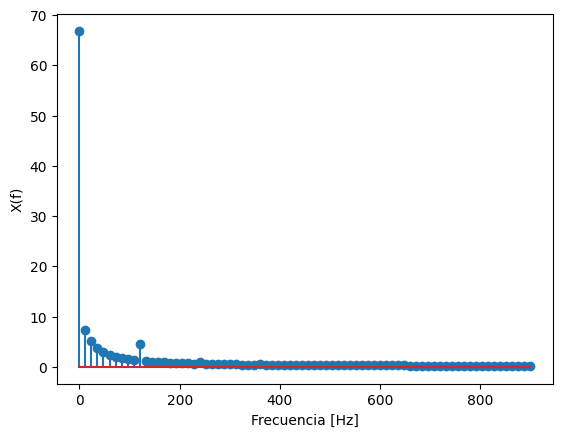

In [ ]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.stem(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('X(f)')
plt.show()

***EJERCICIO 4***

In [1]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

     \ 2.7 MB 12.8 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928467 sha256=23643b2a243238091811ead7e689f91be5ea5dcdde8cb29257864cb7316760d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-qgrmplju/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


In [ ]:
#cargar datos desde drive acceso libre
FILEID = "18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz"


!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  audios.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'audios.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

In [ ]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'link'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

In [ ]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

In [ ]:
!pip install soundfile #instalar sondfile

In [ ]:
import numpy as np
import soundfile as sf  # Para instalar: pip install soundfile

# Parámetros
fs = 48000  # Frecuencia de muestreo esperada
ts = 3  # Duración del segmento en segundos
tl = np.array([0])  # Solo un punto de inicio (0 segundos), ya que los audios son cortos
Ns = len(wav_files) * len(tl)  # Cantidad de segmentos (uno por audio)
x_t = np.zeros((Ns, int(ts * fs), 2))  # Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns, 1))  # Vector tipo de género
name_c = []

# Leer archivos wav
i = 0
for name in wav_files:
    # Leer archivo de audio
    x, file_fs = sf.read(path + name)

    # Verificar si la frecuencia de muestreo es diferente de la esperada
    if file_fs != fs:
        print(f"Advertencia: {name} tiene una frecuencia de muestreo {file_fs}, esperada {fs}.")
        continue  # Saltar este archivo

    # Verificar si el archivo tiene menos de 3 segundos
    audio_duration = x.shape[0] / file_fs  # Duración en segundos
    if audio_duration < ts:
        # Rellenar con ceros para que tenga exactamente 3 segundos
        padding = np.zeros((int(ts * fs) - x.shape[0], x.shape[1]))
        x = np.vstack((x, padding))
        print(f"Audio {name} rellenado con ceros (duración original: {audio_duration}s).")

    # Extraer segmento desde el inicio (0 segundos)
    start_idx = 0
    end_idx = int(ts * fs)
    segment = x[start_idx:end_idx, :]

    # Verificar si el archivo tiene 2 canales
    if segment.shape[1] != 2:
        print(f"Advertencia: {name} no tiene 2 canales. Se ignorará.")
        continue

    # Asignar segmento al conjunto final
    x_t[i] = segment
    label[i] = int(name[-5])  # Tipo de género (asumido como el quinto carácter desde el final del nombre)
    name_c += [name[:-6]]
    print(f"{i} lectura: {name}; segmento extraído; tipo música {label[i]}")
    i += 1

# Imprimir resultado final
print(f"Forma final de x_t: {x_t[:i].shape}")
print(f"Cantidad de segmentos procesados: {i}")


In [ ]:
from IPython.display import Audio #reproducir segmento
Audio(x_t[55].T,rate=fs)

In [ ]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

In [ ]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

In [ ]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

In [ ]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#visualización de datos
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw_[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

In [ ]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

#plt.colorbar()
plt.show()

In [ ]:
#reproducir audio
i=55
Audio(x_t[i].T,rate=fs)

In [ ]:
i = 23
Audio(x_t[i].T,rate=fs)

In [ ]:
i = 64
Audio(x_t[i].T,rate=fs)

In [ ]:
import joblib
#guardar modelo
if not os.path.exists('modelo'):
    os.mkdir('modelo')
filename_ = 'modelo/palabras_clave'
model_ ={'Xw_':Xw_,'fmax': fmax, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs}
joblib.dump(model_,filename_+".pkl")

In [ ]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

In [ ]:
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()